# Finding the high value customers
Sprocket Central Pty Ltd has given us a new list of 1000 potential customers with their demographics and attributes. However, these customers do not have prior transaction history with the organisation. 

The marketing team at Sprocket Central Pty Ltd is sure that, if correctly analysed, the data would reveal useful customer insights which could help optimise resource allocation for targeted marketing. Hence, improve performance by focusing on high value customers.

For context, Sprocket Central Pty Ltd is a long-standing KPMG client whom specialises in high-quality bikes and accessible cycling accessories to riders. Their marketing team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour. 

Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, please recommend which of these 1000 new customers should be targeted to drive the most value for the organisation. 

### Doing the necessary imports

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

### Importing Transactions data from excel sheet

In [2]:
Transac=pd.read_excel(io='D:\\IVY\\My projects\\KPMG\\KPMG_VI_New_raw_data_update_final.xlsx',
                           sheet_name='Transactions')

In [3]:
Transac=Transac.drop_duplicates()
Transac.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Importing Customer Demographics data from excel sheet

In [4]:
CustDemo=pd.read_excel(io='D:\\IVY\\My projects\\KPMG\\KPMG_VI_New_raw_data_update_final.xlsx',
                           sheet_name='CustomerDemographic')
CustDemo=CustDemo.drop_duplicates()
CustDemo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [5]:
CustDemo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [6]:
CustDemo.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

### Importing Customer Address data from excel sheet

In [7]:
CustAdd=pd.read_excel(io='D:\\IVY\\My projects\\KPMG\\KPMG_VI_New_raw_data_update_final.xlsx',
                           sheet_name='CustomerAddress')
CustAdd=CustAdd.drop_duplicates()
CustAdd.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [8]:
CustAdd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 218.7+ KB


In [9]:
CustAdd.nunique()

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

### There is inconsistency in the number of customer_id in CustDemo and CustAdd, so we decided to merge them on customer_id

In [10]:
#Merging Customer Demographics and Customer Address into a single Dataframe
CustData=CustDemo.merge(CustAdd,how='inner', on=['customer_id'])
CustData.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9


In [11]:
CustData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3996 entries, 0 to 3995
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3996 non-null   int64         
 1   first_name                           3996 non-null   object        
 2   last_name                            3871 non-null   object        
 3   gender                               3996 non-null   object        
 4   past_3_years_bike_related_purchases  3996 non-null   int64         
 5   DOB                                  3909 non-null   datetime64[ns]
 6   job_title                            3492 non-null   object        
 7   job_industry_category                3341 non-null   object        
 8   wealth_segment                       3996 non-null   object        
 9   deceased_indicator                   3996 non-null   object        
 10  default     

### Creating Final Dataframe to store the merged data of Transactions and CustData

In [12]:
Final=Transac.merge(CustData, how='inner', on=['customer_id'])

### Dropping unecessary columns

In [13]:
Final=Final.drop(['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25','first_name', 'last_name','default','postcode', 'country','address'],axis=1)
Final.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,VIC,6
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,VIC,6
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,VIC,6
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,NSW,5
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,NSW,5


In [14]:
Final.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'state', 'property_valuation'],
      dtype='object')

In [15]:
Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 0 to 19967
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19968 non-null  int64         
 1   product_id                           19968 non-null  int64         
 2   customer_id                          19968 non-null  int64         
 3   transaction_date                     19968 non-null  datetime64[ns]
 4   online_order                         19609 non-null  float64       
 5   order_status                         19968 non-null  object        
 6   brand                                19773 non-null  object        
 7   product_line                         19773 non-null  object        
 8   product_class                        19773 non-null  object        
 9   product_size                         19773 non-null  object        
 10  list_price

In [16]:
#Checking the unique values in the Final Dataframe
Final.nunique()

transaction_id                         19968
product_id                               101
customer_id                             3489
transaction_date                         364
online_order                               2
order_status                               2
brand                                      6
product_line                               4
product_class                              3
product_size                               3
list_price                               294
standard_cost                            100
product_first_sold_date                  100
gender                                     6
past_3_years_bike_related_purchases      100
DOB                                     3047
job_title                                195
job_industry_category                      9
wealth_segment                             3
deceased_indicator                         2
owns_car                                   2
tenure                                    22
state     

In [17]:
#Checking the head of the Final Dataframe
Final.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,VIC,6
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,VIC,6
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,VIC,6
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,NSW,5
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,NSW,5


# Feature Engineering

### There is inconsistency in the gender column, so we try to clean the data by making the necessary replacmenets

In [18]:
Final['gender'].value_counts()

Female    9979
Male      9510
U          455
F           11
Femal        7
M            6
Name: gender, dtype: int64

In [19]:
Final['gender'].replace('F','Female',inplace=True)
Final['gender'].replace('M','Male',inplace=True)
Final['gender'].replace('Femal','Female',inplace=True)
Final['gender'].replace('U','Universal',inplace=True)

### Converting Transaction Date to the necessary format

In [20]:
def CreateDate(InpString):
    return(datetime.datetime.strftime(InpString, '%Y-%m-%d'))

Final['transaction_date'].apply(CreateDate)


0        2017-02-25
1        2017-10-16
2        2017-04-26
3        2017-05-21
4        2017-10-05
            ...    
19963    2017-02-02
19964    2017-12-06
19965    2017-06-20
19966    2017-12-26
19967    2017-12-03
Name: transaction_date, Length: 19968, dtype: object

In [21]:
#Final['DOB']=pd.to_datetime(Final.DOB)
#Final['DOB']

### Deriving Age from DateofBirth (DOB)

In [22]:
today = datetime.date.today()
today

datetime.date(2022, 2, 1)

In [23]:
def dob_to_age(born):
    today = datetime.date.today()
    return (today.year - born.year)

In [24]:
Final['Age']=Final['DOB'].apply(lambda x: dob_to_age(x))

In [25]:
# Dropping DOB after deriving Age since it will be of no help in machine learning
Final=Final.drop(['DOB'],axis=1)

In [26]:
Final.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,Age
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,19,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,VIC,6,67.0
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,19,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,VIC,6,67.0
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,19,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,VIC,6,67.0
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,89,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,NSW,5,43.0
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,89,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,NSW,5,43.0


# Missing values treatment

<AxesSubplot:>

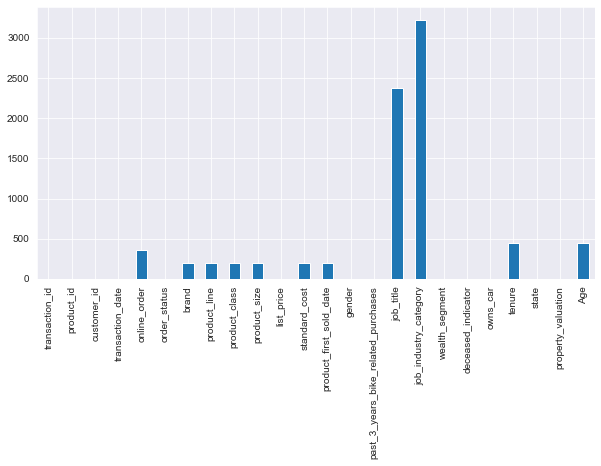

In [27]:
plt.figure(figsize=(10,5))
Final.isnull().sum().plot(kind='bar')

In [28]:
# Treating missing values of categorical variable with MODE value
Final['job_title'].fillna(value=Final['job_title'].mode()[0], inplace=True)
Final['job_industry_category'].fillna(value=Final['job_industry_category'].mode()[0], inplace=True)

In [29]:
Final['online_order'].fillna(value=Final['online_order'].mode()[0], inplace=True)
Final['brand'].fillna(value=Final['brand'].mode()[0], inplace=True)
Final['product_line'].fillna(value=Final['product_line'].mode()[0], inplace=True)
Final['product_class'].fillna(value=Final['product_class'].mode()[0], inplace=True)
Final['product_size'].fillna(value=Final['product_size'].mode()[0], inplace=True)

In [30]:
# Treating missing values of continuous variable with Median value
Final['tenure'].fillna(value=Final['tenure'].median(), inplace=True)
Final['Age'].fillna(value=Final['Age'].median(), inplace=True)
Final['standard_cost'].fillna(value=Final['standard_cost'].median(), inplace=True)

In [31]:
#Checking missing values after treatment
Final.isnull().sum()

transaction_id                           0
product_id                               0
customer_id                              0
transaction_date                         0
online_order                             0
order_status                             0
brand                                    0
product_line                             0
product_class                            0
product_size                             0
list_price                               0
standard_cost                            0
product_first_sold_date                195
gender                                   0
past_3_years_bike_related_purchases      0
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
state                                    0
property_valuation                       0
Age        

## Deriving Profit column

In [32]:
Final['Profit']=Final['list_price']-Final['standard_cost']
Final.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,Age,Profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,VIC,6,67.0,17.87
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,VIC,6,67.0,448.68
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,VIC,6,67.0,179.44
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,NSW,5,43.0,1702.55
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,NSW,5,43.0,451.65


In [33]:
Final.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,past_3_years_bike_related_purchases,tenure,property_valuation,Age,Profit
count,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000
mean,9997.846504,45.365986,1740.254307,0.509665,1107.780004,555.617309,48.757412,10.689052,7.516376,44.918820,552.162695
std,5773.929973,30.750115,1009.819066,0.499919,582.852548,404.007418,28.611359,5.611093,2.824783,12.775938,494.427533
min,1.000000,0.000000,1.000000,0.000000,12.010000,7.210000,0.000000,1.000000,1.000000,20.000000,-491.500000
25%,4997.750000,18.000000,861.750000,0.000000,575.270000,215.140000,24.000000,6.000000,6.000000,36.000000,133.780000
50%,9996.500000,44.000000,1739.500000,1.000000,1163.890000,507.580000,48.000000,11.000000,8.000000,45.000000,445.210000
75%,14996.250000,72.000000,2614.250000,1.000000,1635.300000,795.100000,73.000000,15.000000,10.000000,54.000000,830.240000
max,20000.000000,100.000000,3500.000000,1.000000,2091.470000,1759.850000,99.000000,22.000000,12.000000,179.000000,1702.550000


# Visual Exploratory Data Analysis using Seaborn and Matplotlib

### Pairplot to visualize the relationship between continuous variables

<Figure size 720x432 with 0 Axes>

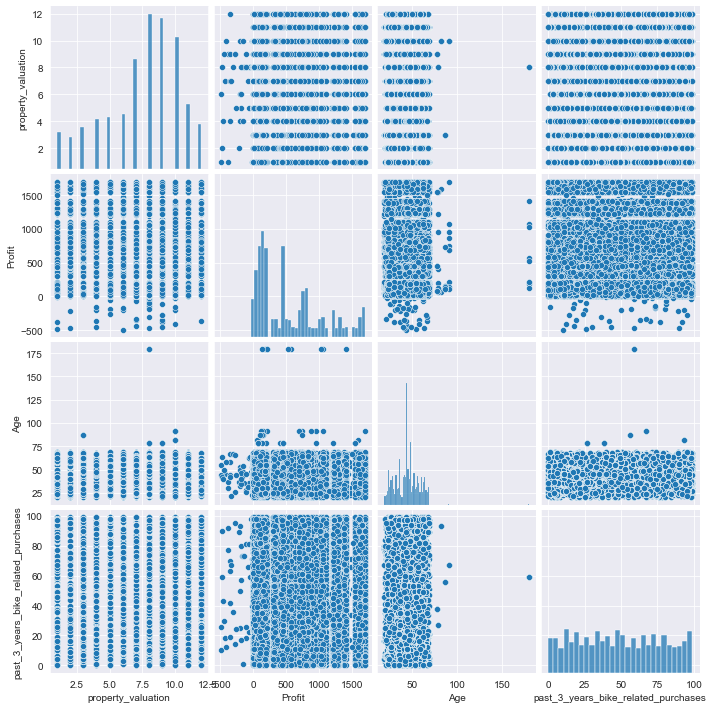

In [34]:
plt.figure(figsize=(10,6))
sns.pairplot(Final[['property_valuation', 'Profit', 'Age','past_3_years_bike_related_purchases']])

There is no visible correlation between the continuous variables.

## Distplot to see the distribution of continuous variables

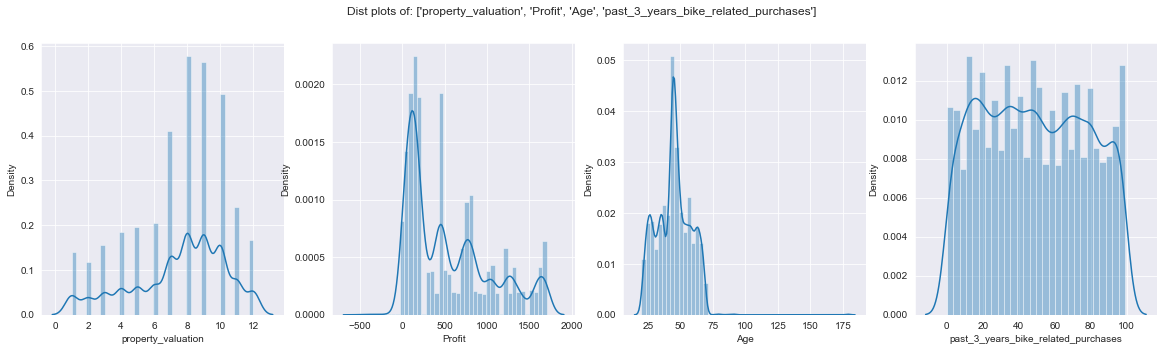

In [35]:
colsToPlot=['property_valuation', 'Profit', 'Age','past_3_years_bike_related_purchases']
fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
fig.suptitle('Dist plots of: '+ str(colsToPlot))

for i, feature in zip(colsToPlot, range(len(colsToPlot))):
        sns.distplot(a=Final[i],ax=subPlot[feature])


### Distplot Interpretation
* property_valuation has the highest distribution in the range of 7 to 10.
* Profit has a mean of around 500 and the highest being around 1700 dollars.
* Most of the customers fall in the Age group of 40-50 years, though there is an outlier near 175 years which needs to be treated
* past_3_years_bike_related_purchases has a uniform distribution with a max of 99 purchases.

# Outlier Treatment for 'Age' column

In [36]:
#Final['Age'][Final['Age']>91]
Final[Final['Age']>91]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,Age,Profit
5894,1039,8,34,2017-07-01,1.0,Approved,Solex,Road,medium,small,...,Legal Assistant,IT,Affluent Customer,N,No,20.0,QLD,8,179.0,187.39
5895,1107,15,34,2017-08-22,0.0,Approved,Norco Bicycles,Standard,low,medium,...,Legal Assistant,IT,Affluent Customer,N,No,20.0,QLD,8,179.0,209.84
5896,2638,83,34,2017-04-07,0.0,Approved,Solex,Touring,medium,large,...,Legal Assistant,IT,Affluent Customer,N,No,20.0,QLD,8,179.0,1408.91
5897,9044,12,34,2017-02-13,0.0,Approved,WeareA2B,Standard,medium,medium,...,Legal Assistant,IT,Affluent Customer,N,No,20.0,QLD,8,179.0,1069.55
5898,9792,60,34,2017-06-25,1.0,Approved,Giant Bicycles,Standard,high,small,...,Legal Assistant,IT,Affluent Customer,N,No,20.0,QLD,8,179.0,217.51
5899,12083,13,34,2017-07-23,0.0,Approved,Solex,Standard,medium,medium,...,Legal Assistant,IT,Affluent Customer,N,No,20.0,QLD,8,179.0,574.62
5900,16935,0,34,2017-02-14,0.0,Approved,Solex,Standard,medium,medium,...,Legal Assistant,IT,Affluent Customer,N,No,20.0,QLD,8,179.0,526.59
5901,17808,96,34,2017-04-10,1.0,Approved,WeareA2B,Road,low,small,...,Legal Assistant,IT,Affluent Customer,N,No,20.0,QLD,8,179.0,129.01
5902,19291,65,34,2017-09-19,0.0,Approved,WeareA2B,Standard,medium,medium,...,Legal Assistant,IT,Affluent Customer,N,No,20.0,QLD,8,179.0,1028.76


**We have a customer with customer_id = 34, having an age of 179 years, which is absurd, so we drop these rows**

In [37]:
# Deleting rows based on the index
delrow=Final[Final['Age']==179].index
Final=Final.drop(delrow,axis=0)
Final.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,Age,Profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,VIC,6,67.0,17.87
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,VIC,6,67.0,448.68
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,VIC,6,67.0,179.44
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,NSW,5,43.0,1702.55
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,NSW,5,43.0,451.65


## Visualizing the Age distribution again after outlier treatment

<AxesSubplot:xlabel='Age', ylabel='Density'>

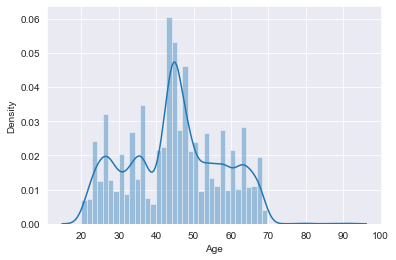

In [38]:
sns.distplot(Final['Age'])

## Number of cars owned State-wise

<AxesSubplot:xlabel='state'>

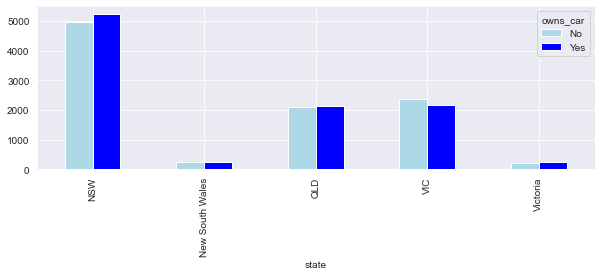

In [39]:
CrossTabResult=pd.crosstab(index=Final['state'], columns=Final['owns_car'])
#CrossTabResult.plot.bar(figsize=(10,3), color=['lightblue','blue'])
CrossTabResult.plot(kind='bar',figsize=(10,3), color=['lightblue','blue'])

## Brand-wise Profit

<AxesSubplot:>

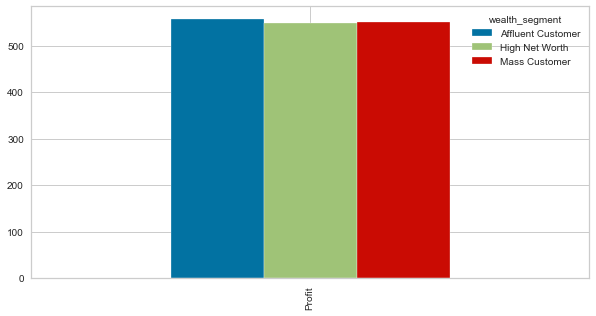

In [135]:
piv=pd.pivot_table(Final,values='Profit',columns='wealth_segment')
piv.plot(kind='bar',figsize=(10,5))

## Gender-wise Past 3 years bike related purchases

(array([0]), [Text(0, 0, 'past_3_years_bike_related_purchases')])

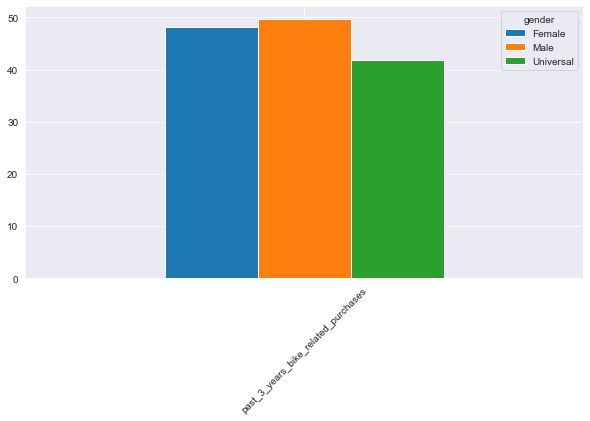

In [41]:
piv=pd.pivot_table(Final,values='past_3_years_bike_related_purchases',columns='gender')
piv.plot(kind='bar',figsize=(10,5))
plt.xticks(rotation=45)

## Job Industry Category wise Profit

<AxesSubplot:xlabel='job_industry_category'>

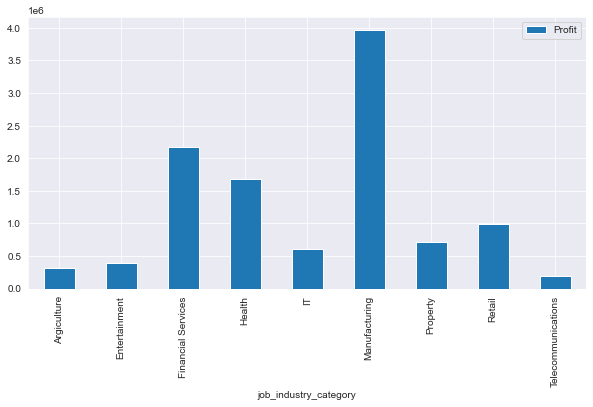

In [42]:
piv2=pd.pivot_table(Final,values='Profit',index='job_industry_category',aggfunc=sum)
piv2.plot(kind='bar',figsize=(10,5))

 ### Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted six categorical predictors in the data

<b>Categorical Predictors: </b>

'order_status', 'brand', 'product_line', 'product_class', 'product_size', 'gender','job_title', 'job_industry_category', 'wealth_segment', 'deceased_indicator','owns_car','state'
    
We use bar charts to see how the data is distributed for these categorical columns.

In [43]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(50,10))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

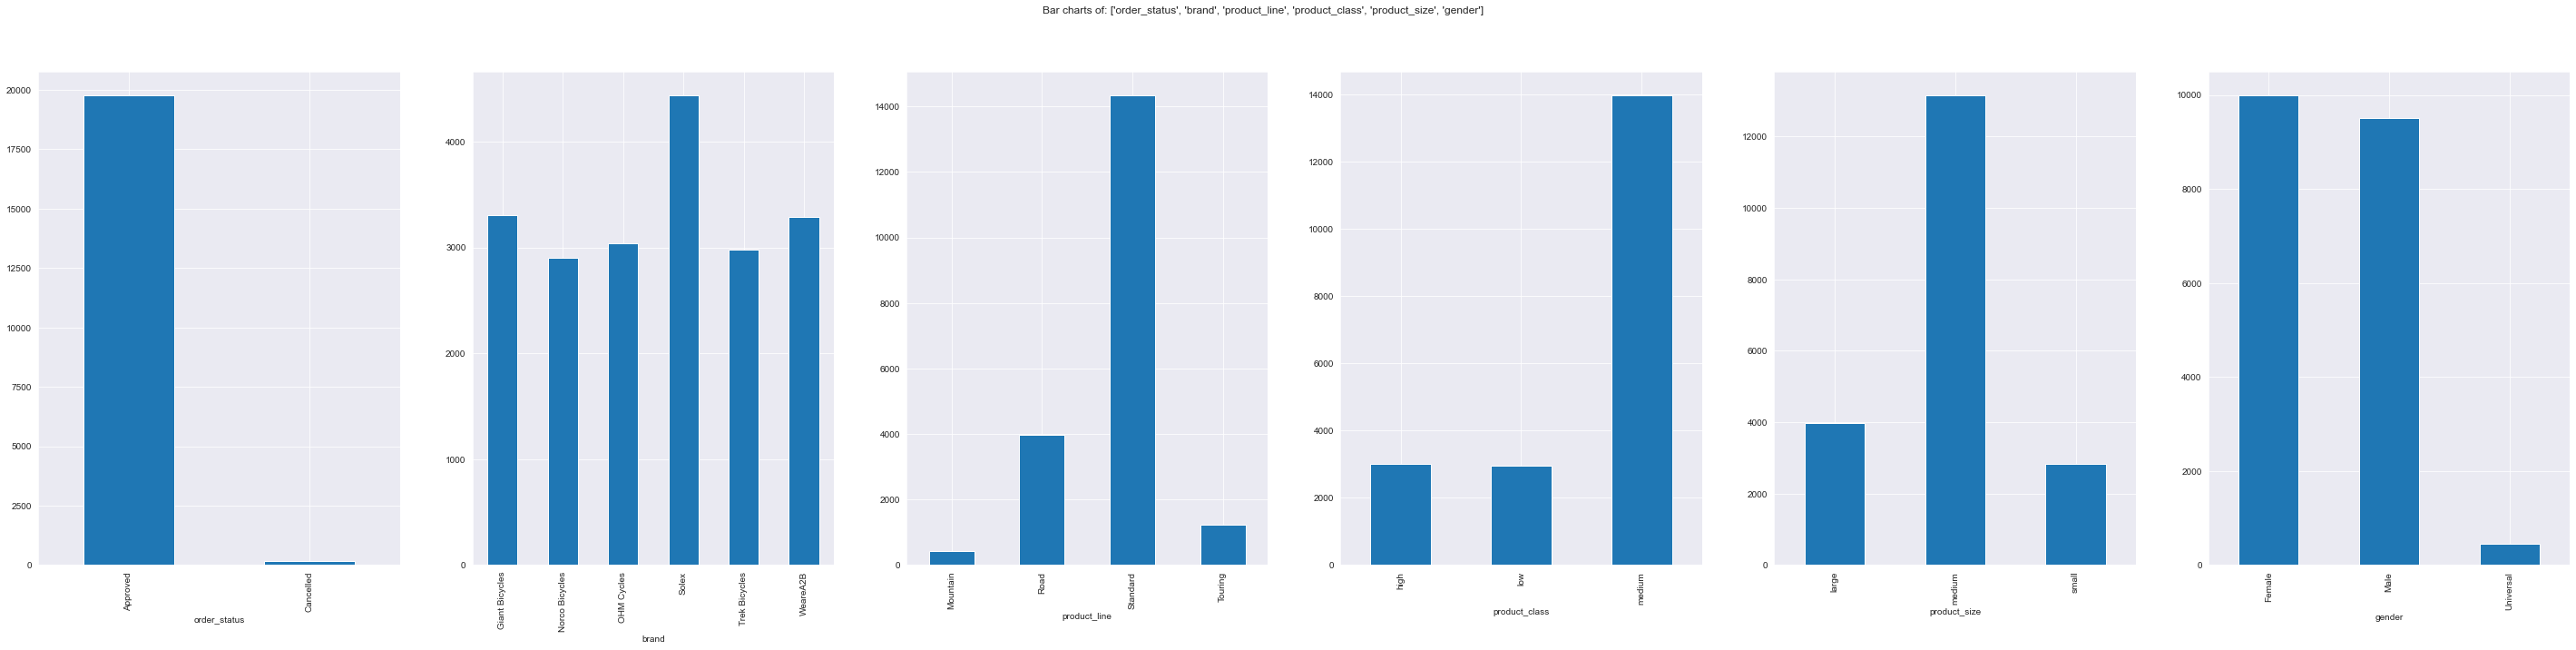

In [44]:
# Calling the function
PlotBarCharts(inpData=Final, colsToPlot=['order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'gender'])

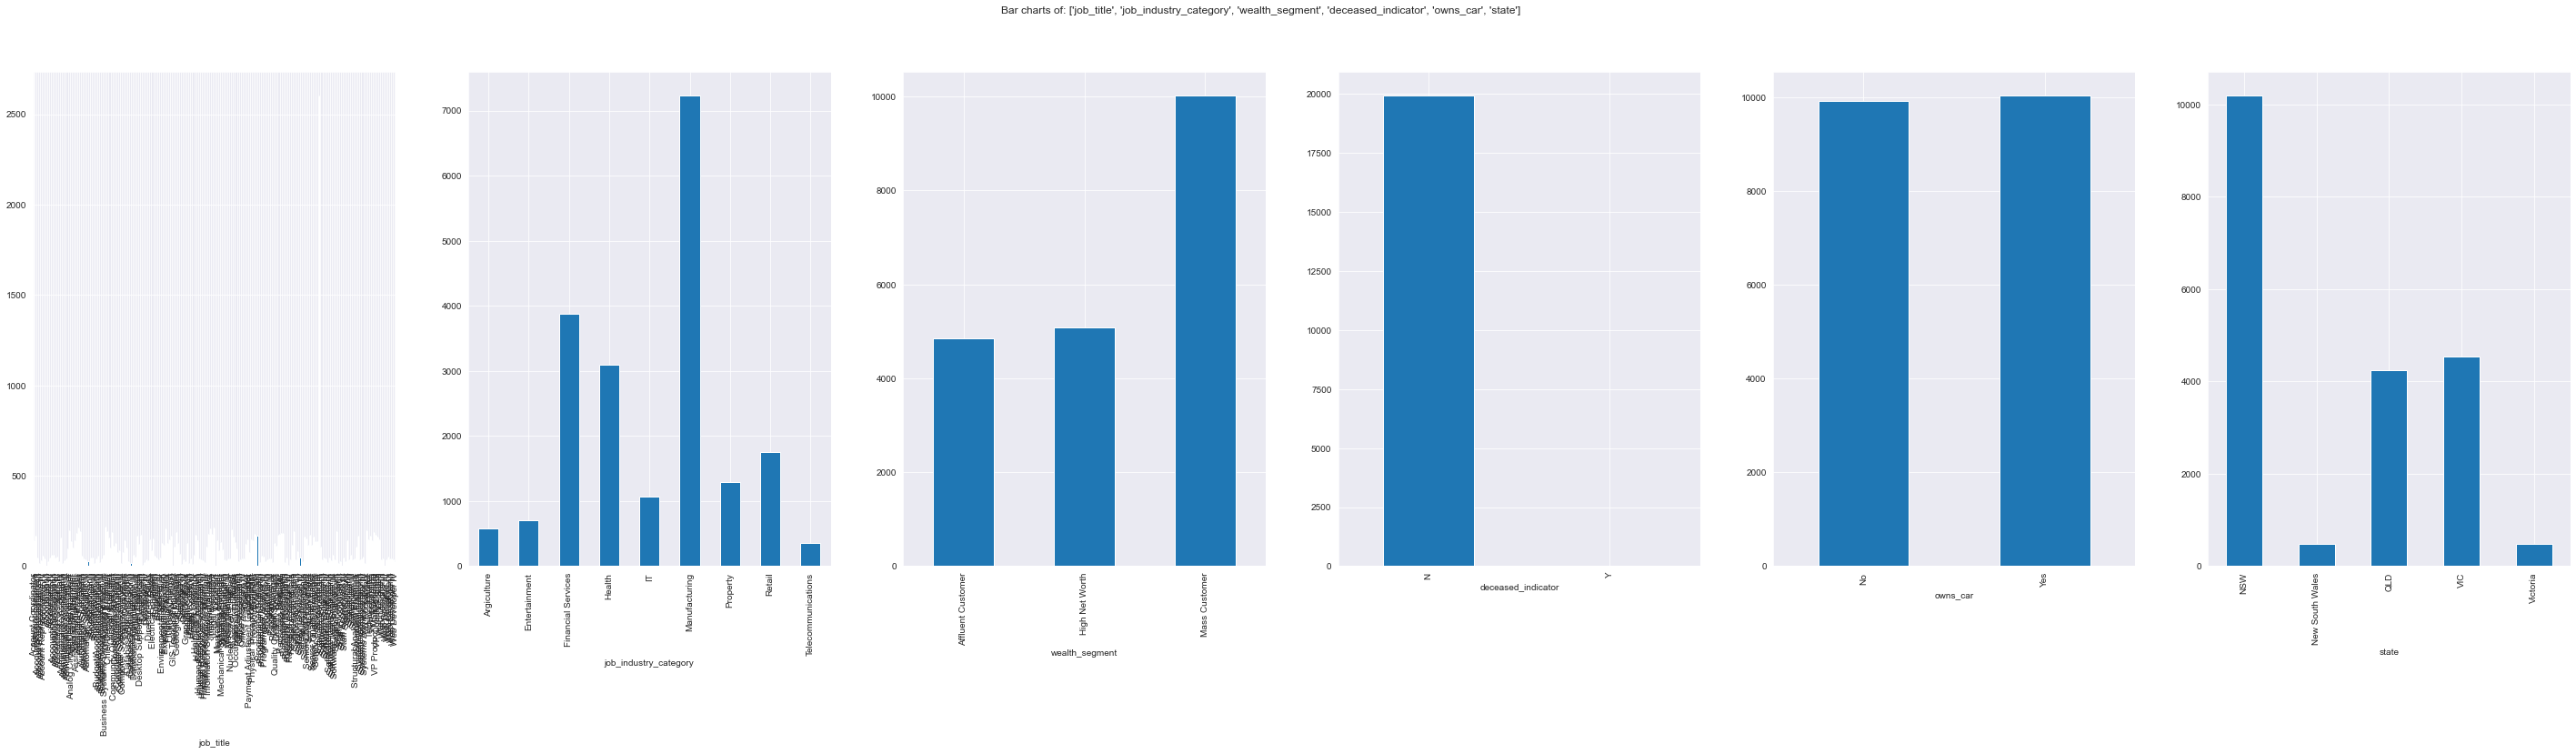

In [45]:
PlotBarCharts(inpData=Final, colsToPlot=['job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car','state'])

## Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

'job_title' has too many levels to analyse.

<b>Selected Categorical Variables</b>: All the categorical variables are selected for further analysis except 'order_status','job_title','deceased_indicator'

 'brand', 'product_line', 'product_class', 'product_size', 'gender','job_industry_category', 'wealth_segment', 
       'owns_car','state'

In [46]:
Final=Final.drop(['order_status','job_title','deceased_indicator'],axis=1)
Final.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,...,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,Age,Profit
0,1,2,2950,2017-02-25,0.0,Solex,Standard,medium,medium,71.49,...,Male,19,Financial Services,Mass Customer,Yes,10.0,VIC,6,67.0,17.87
1,11065,1,2950,2017-10-16,0.0,Giant Bicycles,Standard,medium,medium,1403.50,...,Male,19,Financial Services,Mass Customer,Yes,10.0,VIC,6,67.0,448.68
2,18923,62,2950,2017-04-26,0.0,Solex,Standard,medium,medium,478.16,...,Male,19,Financial Services,Mass Customer,Yes,10.0,VIC,6,67.0,179.44
3,2,3,3120,2017-05-21,1.0,Trek Bicycles,Standard,medium,large,2091.47,...,Female,89,Health,Mass Customer,Yes,10.0,NSW,5,43.0,1702.55
4,6862,4,3120,2017-10-05,0.0,Giant Bicycles,Standard,high,medium,1129.13,...,Female,89,Health,Mass Customer,Yes,10.0,NSW,5,43.0,451.65


# RFM Analysis
**RFM** (Recency, Frequency, Monetary) analysis first we need to create three features R , F & M from the data 
* R — Higher score implies that particular customer has recently made a purchase and will most likely response to current promotion. Low R score reveals the possibility of being churned.
* F — Higher score implies customer has made repeated purchasing at higher frequency. (High demand / Loyalty)
* M — Higher score implies purchasing at larger amount. (High value customer)
lets create those features
## Recency
### To calculate recency, we need to find out  **when was the customer's most recent purchase.**.

In [47]:
# Group by customers and check last date of purchase
recency_Final = Final.groupby(by='customer_id', as_index=False)['transaction_date'].max()
recency_Final.columns = ['customer_id','LastPurshaseDate']
# Calculate recent date to find recency wrt to this date
recent_date=recency_Final.LastPurshaseDate.max()
print(recent_date)
# Calculate recency
recency_Final['Recency'] = recency_Final['LastPurshaseDate'].apply(lambda x: (recent_date - x).days)
recency_Final.drop('LastPurshaseDate',axis=1,inplace=True)
recency_Final.head()

2017-12-30 00:00:00


,customer_id,Recency
0,1,7
1,2,128
2,4,195
3,5,16
4,6,64


## Frequency
### To calculate Frequency we need to check **How often a customer makes a purchase**.

In [48]:
# Calculate the frequency of purchases
frequency_Final = Final.groupby(by=['customer_id'], as_index=False)['transaction_id'].count()
frequency_Final.columns = ['customer_id','Frequency']
frequency_Final.head()

,customer_id,Frequency
0,1,11
1,2,3
2,4,2
3,5,6
4,6,5


## Monetary
### To calculate Monetary value  **How much money did the customer spent during the timeframe?**

In [49]:
# Create column total cost
monetary_Final = Final.groupby(by='customer_id',as_index=False).agg({'Profit': 'sum'})
monetary_Final.columns = ['customer_id','Monetary']
monetary_Final.head()

,customer_id,Monetary
0,1,3018.09
1,2,2226.26
2,4,220.57
3,5,2394.94
4,6,3946.55


## Create RFM Table
### Merge recency dataframe with frequency and monetary dataframe

In [50]:
rfm=pd.merge(recency_Final,frequency_Final,on='customer_id',how='inner')
rfm.head()
# Merge with monetary dataframe to get a table with the 3 columns
rfm = rfm.merge(monetary_Final,on='customer_id')
# Use CustomerID as index
rfm.set_index('customer_id',inplace=True)
# Check the head
rfm.head()

,Recency,Frequency,Monetary
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
4,195,2,220.57
5,16,6,2394.94
6,64,5,3946.55


In [51]:
# Rank each metric R , F & M
rfm['R_rank'] = rfm['Recency'].rank( ascending=False)
rfm['F_rank'] = rfm['Frequency'].rank(ascending=True)
rfm['M_rank'] = rfm['Monetary'].rank(ascending=True)
rfm.head()
# normalize each rank with Max rank
rfm['R_rank_norm']=(rfm['R_rank']/rfm['R_rank'].max())*100
rfm['F_rank_norm']=(rfm['F_rank']/rfm['F_rank'].max())*100
rfm['M_rank_norm']=(rfm['F_rank']/rfm['M_rank'].max())*100
rfm.head()
# Now apply our equation and create final score **Consolidated Score = 0.15*R_rank_norm + 0.28*F_rank_norm + 0.57M_rank_norm**
rfm['RFM_Score']=0.15*rfm['R_rank_norm']+0.28*rfm['F_rank_norm']+0.57*rfm['M_rank_norm']
rfm=rfm.round(0)
rfm.head()

,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
customer_id,,,,,,,,,,
1,7,11,3018.0,3118.0,3412.0,1836.0,90.0,98.0,98.0,97.0
2,128,3,2226.0,448.0,432.0,1173.0,13.0,12.0,12.0,12.0
4,195,2,221.0,132.0,150.0,51.0,4.0,4.0,4.0,4.0
5,16,6,2395.0,2678.0,1996.0,1323.0,77.0,57.0,57.0,60.0
6,64,5,3947.0,1251.0,1411.0,2471.0,36.0,40.0,40.0,40.0


## Dist plots of Recency,Frequency and Monetary

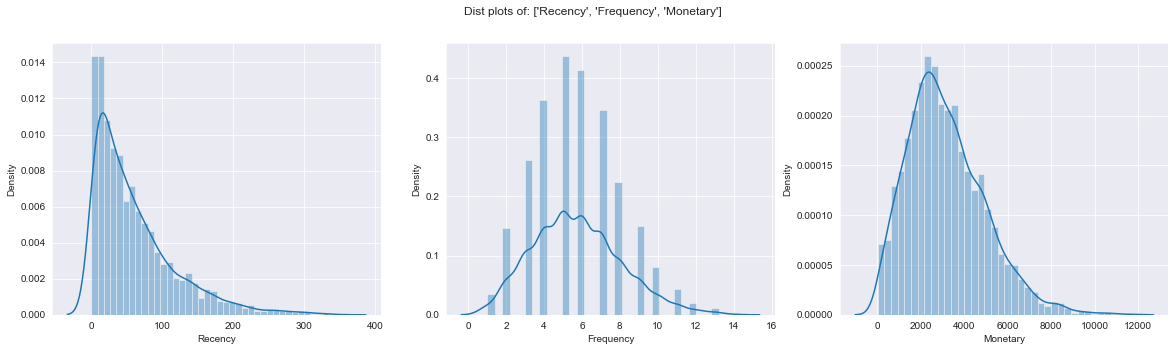

In [52]:
colsToPlot=['Recency','Frequency','Monetary']
fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
fig.suptitle('Dist plots of: '+ str(colsToPlot))

for i, feature in zip(colsToPlot, range(len(colsToPlot))):
        sns.distplot(a=rfm[i],ax=subPlot[feature])


* Recency is slightly right-skewed.
* Frequency has highest distribution in the range of 4 to 7.
* Monetary seems normally distributed.

In [53]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3488 entries, 1 to 3500
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Recency      3488 non-null   int64  
 1   Frequency    3488 non-null   int64  
 2   Monetary     3488 non-null   float64
 3   R_rank       3488 non-null   float64
 4   F_rank       3488 non-null   float64
 5   M_rank       3488 non-null   float64
 6   R_rank_norm  3488 non-null   float64
 7   F_rank_norm  3488 non-null   float64
 8   M_rank_norm  3488 non-null   float64
 9   RFM_Score    3488 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 299.8 KB


In [54]:
rfm.describe()

,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
count,3488.000000,3488.00000,3488.000000,3488.000000,3488.000000,3488.000000,3488.000000,3488.000000,3488.000000,3488.000000
mean,60.795585,5.72219,3159.466456,1744.509748,1744.605505,1744.501147,50.331422,49.843177,49.843177,50.067661
std,57.815498,2.32601,1779.004318,1007.024737,998.391192,1007.042044,29.068281,28.624409,28.624409,26.078349
min,0.000000,1.00000,15.000000,1.000000,25.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,17.000000,4.00000,1884.750000,872.000000,861.000000,872.750000,25.000000,25.000000,25.000000,28.000000
50%,44.000000,6.00000,2892.000000,1733.000000,1996.000000,1744.500000,50.000000,57.000000,57.000000,50.000000
75%,85.000000,7.00000,4236.750000,2629.000000,2517.000000,2616.250000,76.000000,72.000000,72.000000,72.000000
max,353.000000,14.00000,11669.000000,3465.000000,3487.000000,3488.000000,100.000000,100.000000,100.000000,99.000000


In [55]:
rfm.iloc[:,0:3].corr()

,Recency,Frequency,Monetary
Recency,1.000000,-0.378023,-0.280903
Frequency,-0.378023,1.000000,0.714617
Monetary,-0.280903,0.714617,1.000000


### Checking the correlation between Recency, frequency and Monetary through Heatmap

<AxesSubplot:>

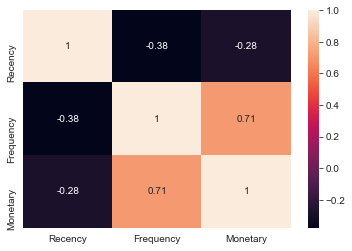

In [56]:
sns.heatmap(rfm.iloc[:,0:3].corr(),annot=True)

## Transform features by scaling each feature to a given range. 
MinMaxScaler scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
rfm_norm=pd.DataFrame(scaler.fit_transform(rfm.iloc[:,6:9]))
rfm_norm.columns=['n_Recency','n_Frequency','n_Monetary']
rfm_norm.head()

,n_Recency,n_Frequency,n_Monetary
0,0.90,0.979798,0.979798
1,0.13,0.111111,0.111111
2,0.04,0.030303,0.030303
3,0.77,0.565657,0.565657
4,0.36,0.393939,0.393939


## K-Means Clustering

### Finding the best number of clusters based on the inertia value

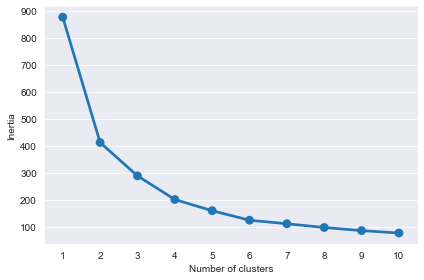

In [58]:
# Finding the best number of clusters based on the inertia value
%matplotlib inline
from sklearn.cluster import KMeans
inertiaValue = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='random',
                n_init=10, 
                max_iter=4000,
                tol=1e-04,
                random_state=0)
    
    km.fit(rfm_norm)
    inertiaValue.append(km.inertia_)
    
sns.pointplot(x=list(range(1,11)),y=inertiaValue)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.tight_layout()
#plt.savefig('elbow.png', dpi=300)
plt.show()

### Using 'Elbow' method to decide optimal number of clusters

In [59]:
# Defining the K-Means object for best number of clusters. n=3 in this case
km = KMeans(n_clusters=5, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=3)
# Running the clustering algorithm on the data set
predictedCluster = km.fit_predict(rfm_norm)
print(predictedCluster)
print('Inertia:', km.inertia_)

rfm['Segment']=predictedCluster

[3 1 1 ... 2 4 2]
Inertia: 158.73595216721748


In [136]:
#Grouping by segment to get the mean value of each segement
rfm.groupby("Segment").mean()

,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
Segment,,,,,,,,,,
Bronze,125.348252,3.023776,1622.920280,687.323077,503.068531,798.254545,19.829371,14.358042,14.358042,15.250350
Diamond,14.073341,7.740396,4247.313155,2801.621653,2662.183935,2371.761350,80.844005,76.167637,76.167637,77.004657
Gold,86.592047,5.494845,3056.519882,1051.184094,1700.484536,1762.394698,30.322533,48.412371,48.412371,45.991163
Platinum,67.261168,8.178694,4527.113402,1316.243986,2857.417526,2518.457045,37.965636,81.754296,81.754296,75.345361
Silver,18.989280,4.068913,2298.977029,2614.108729,951.038285,1247.039816,75.418070,27.114855,27.114855,34.465544


In [61]:
humanization = {3:"Diamond", 4:"Platinum", 2:"Gold" , 0:"Silver", 1:"Bronze"}
rfm["Segment"].replace(humanization,inplace=True)
rfm

,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Segment
customer_id,,,,,,,,,,,
1,7,11,3018.0,3118.0,3412.0,1836.0,90.0,98.0,98.0,97.0,Diamond
2,128,3,2226.0,448.0,432.0,1173.0,13.0,12.0,12.0,12.0,Bronze
4,195,2,221.0,132.0,150.0,51.0,4.0,4.0,4.0,4.0,Bronze
5,16,6,2395.0,2678.0,1996.0,1323.0,77.0,57.0,57.0,60.0,Diamond
6,64,5,3947.0,1251.0,1411.0,2471.0,36.0,40.0,40.0,40.0,Gold
...,...,...,...,...,...,...,...,...,...,...,...
3496,256,4,2046.0,44.0,861.0,993.0,1.0,25.0,25.0,21.0,Bronze
3497,52,3,1648.0,1533.0,432.0,701.0,44.0,12.0,12.0,17.0,Bronze
3498,127,6,3147.0,454.0,1996.0,1922.0,13.0,57.0,57.0,51.0,Gold


Less recency goes to highest hierarchical segment, and the opposite. Most frequent segment is not the same but this segment is paying incredible amounts of money, which is a good thing considering they’re purchasing products a bit less frequently and much more heavily.

In [62]:
!pip install yellowbrick --user

In [63]:
from yellowbrick.cluster import SilhouetteVisualizer
SilhouetteVisualizer(KMeans(5,random_state=42),rfm_norm,colors='yellowbrick')

SilhouetteVisualizer(ax=      n_Recency  n_Frequency  n_Monetary
0          0.90     0.979798    0.979798
1          0.13     0.111111    0.111111
2          0.04     0.030303    0.030303
3          0.77     0.565657    0.565657
4          0.36     0.393939    0.393939
...         ...          ...         ...
3483       0.01     0.242424    0.242424
3484       0.44     0.111111    0.111111
3485       0.13     0.565657    0.565657
3486       0.45     0.717172    0.717172
3487       0.09     0.565657    0.565657

[3488 rows x 3 columns],
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=5, random_state=42))

### Using plotly to visualize the clusters

In [147]:
import plotly.express as px
fig= px.scatter_3d(rfm_norm,x='n_Recency',y='n_Frequency',z='n_Monetary',color=rfm["Segment"])
fig.show()

## Line Plot for each cluster

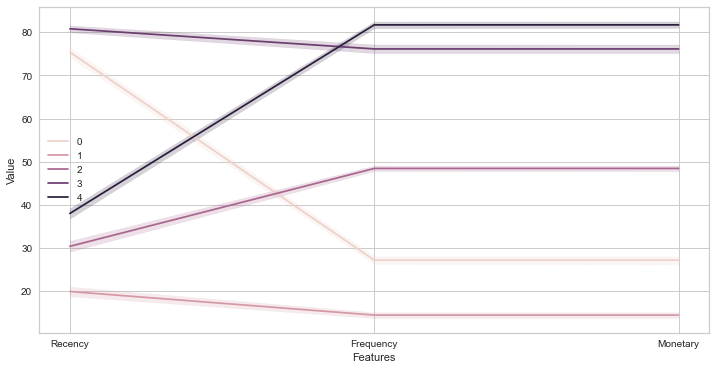

In [68]:
plt.figure(figsize=(12,6))
rfm_=pd.DataFrame(scaler.inverse_transform(rfm_norm))
rfm_.columns = ['Recency','Frequency','Monetary']
rfm_['customer_id']= rfm.index
rfm_['Cluster']= km.labels_

melted_rfm_normalized = pd.melt(rfm_.reset_index(),
                               id_vars=['customer_id','Cluster'],
                               value_vars=['Recency','Frequency','Monetary'],
                               var_name='Features',
                               value_name='Value')
sns.lineplot('Features','Value',hue='Cluster',data=melted_rfm_normalized)
plt.legend()

## Importing the New Customer List

In [77]:
Newlist=pd.read_excel(io='D:\\IVY\\My projects\\KPMG\\KPMG_VI_New_raw_data_update_final.xlsx',
                           sheet_name='NewCustomerList')

In [78]:
Newlist=Newlist.drop_duplicates()
Newlist.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.59,0.7375,0.921875,0.783594,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.44,0.4400,0.550000,0.467500,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.85,0.8500,0.850000,0.850000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.81,1.0125,1.012500,1.012500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.90,0.9000,1.125000,1.125000,4,4,1.703125


In [79]:
Newlist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

## Removing useless columns

In [80]:
Newlist=Newlist.drop(['first_name','last_name','Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'address','country','postcode','Rank','Value'],axis=1)
Newlist.head()

,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation
0,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,QLD,6
1,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,NSW,11
2,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,VIC,5
3,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,QLD,1
4,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,NSW,9


In [81]:
Newlist.describe()

,past_3_years_bike_related_purchases,tenure,property_valuation
count,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,7.397000
std,27.796686,5.037145,2.758804
min,0.000000,0.000000,1.000000
25%,26.750000,7.000000,6.000000
50%,51.000000,11.000000,8.000000
75%,72.000000,15.000000,9.000000
max,99.000000,22.000000,12.000000


In [82]:
Newlist.nunique()

gender                                   3
past_3_years_bike_related_purchases    100
DOB                                    958
job_title                              184
job_industry_category                    9
wealth_segment                           3
deceased_indicator                       1
owns_car                                 2
tenure                                  23
state                                    3
property_valuation                      12
dtype: int64

## Deriving Age from DOB column

In [83]:
Newlist['Age']=Newlist['DOB'].apply(lambda x: dob_to_age(x))
Newlist.head()

,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,Age
0,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,QLD,6,65.0
1,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,NSW,11,52.0
2,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,VIC,5,48.0
3,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,QLD,1,43.0
4,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,NSW,9,57.0


In [84]:
Newlist=Newlist.drop(['DOB'],axis=1)
Newlist.head()

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,Age
0,Male,86,General Manager,Manufacturing,Mass Customer,N,Yes,14,QLD,6,65.0
1,Male,69,Structural Engineer,Property,Mass Customer,N,No,16,NSW,11,52.0
2,Female,10,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,VIC,5,48.0
3,Female,64,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,QLD,1,43.0
4,Female,34,Financial Analyst,Financial Services,Affluent Customer,N,No,19,NSW,9,57.0


# Missing values treatment in the new customer list

<AxesSubplot:>

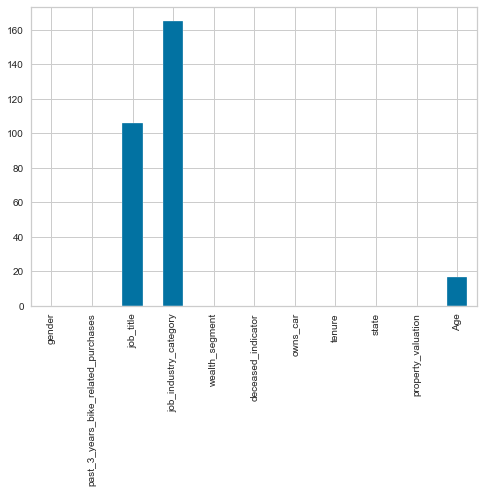

In [85]:
Newlist.isnull().sum().plot(kind='bar')

In [86]:
# Treating missing values of categorical variable with MODE value
Newlist['job_title'].fillna(value=Newlist['job_title'].mode()[0], inplace=True)
Newlist['job_industry_category'].fillna(value=Newlist['job_industry_category'].mode()[0], inplace=True)

In [87]:
# Treating missing values of continuous variable with MEDIAN value
Newlist['Age'].fillna(value=Newlist['Age'].median(), inplace=True)

In [88]:
# Checking the columns after missing value treatment
Newlist.isnull().sum()

gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
state                                  0
property_valuation                     0
Age                                    0
dtype: int64

## Dealing with the inconsistency in gender column

In [89]:
Newlist['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [90]:
Newlist['gender'].replace('U','Universal',inplace=True)

## Visual Exploratory Data Analysis using Seaborn and Matplotlib

Categorical variables: Bar plot

Continuous variables: Histogram

### Visualize distribution of all the Categorical Predictor variables in the data using bar plots

In [91]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(50,10))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

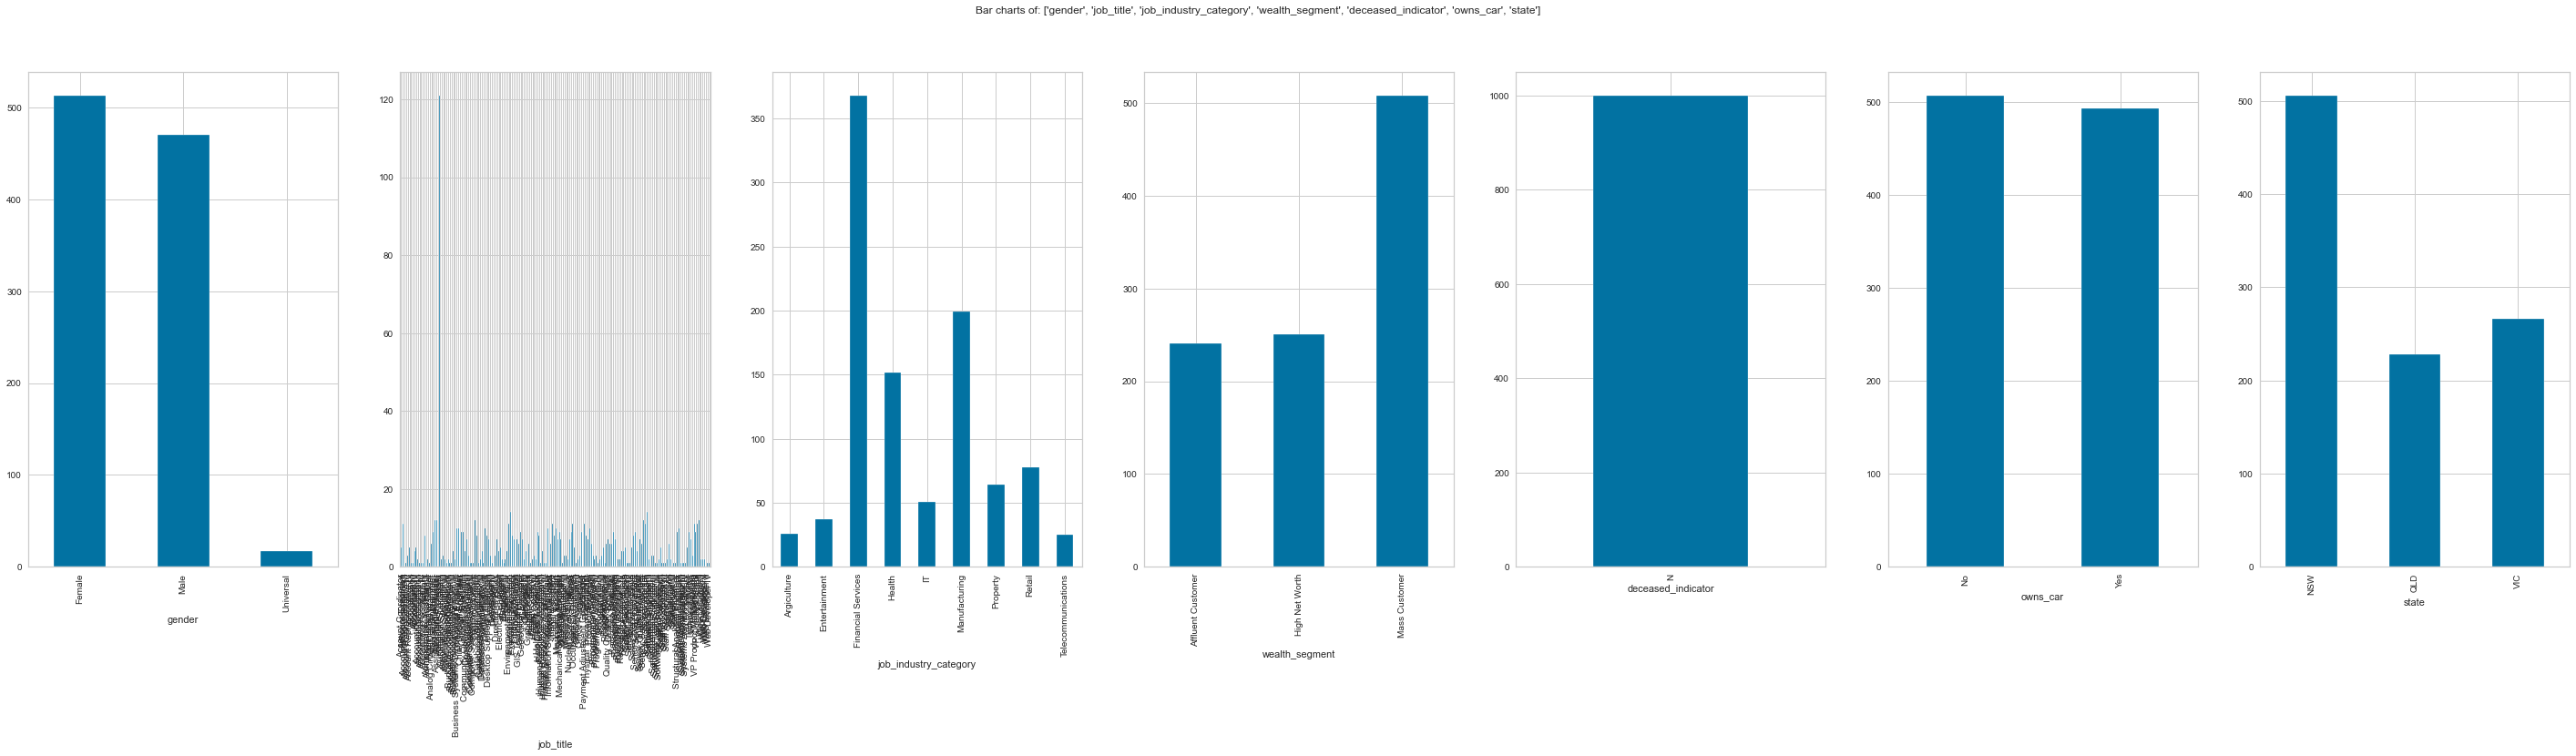

In [92]:
# Calling the function
PlotBarCharts(inpData=Newlist, colsToPlot=['gender','job_title','job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car','state'])

## Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

'job_title' has too many levels to analyse. 'deceased_indicator' has only one category.

<b>Selected Categorical Variables</b>: All the categorical variables are selected for further analysis except 'job_title' and 'deceased_indicator' 

 'gender','job_industry_category', 'wealth_segment','owns_car','state'

## Distplot to see the distribution of continuous variables

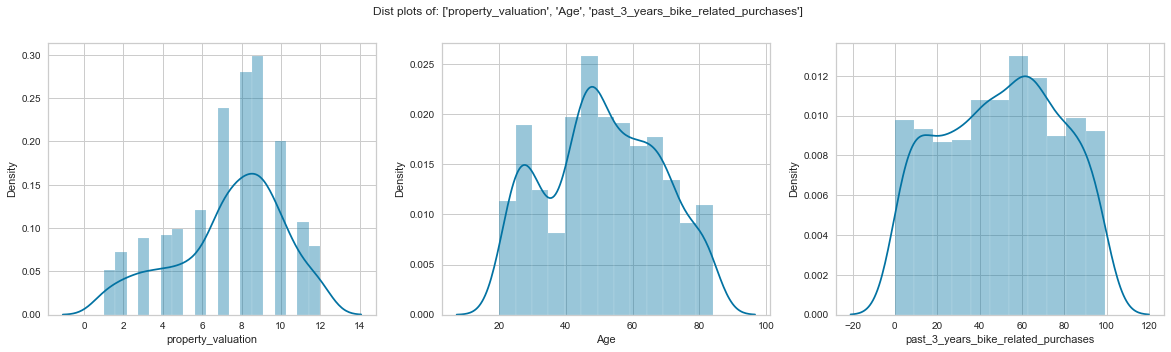

In [93]:
colsToPlot=['property_valuation', 'Age','past_3_years_bike_related_purchases']
fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
fig.suptitle('Dist plots of: '+ str(colsToPlot))

for i, feature in zip(colsToPlot, range(len(colsToPlot))):
        sns.distplot(a=Newlist[i],ax=subPlot[feature])

### Distplot Interpretation
* property_valuation has the highest distribution in the range of 7 to 9.
* Most of the customers fall in the Age group of 40-65 years, though there is an outlier near 175 years which needs to be treated
* past_3_years_bike_related_purchases has a uniform distribution with a max of 100 purchases.

## Pairplot to vusialize the relationship between different variables

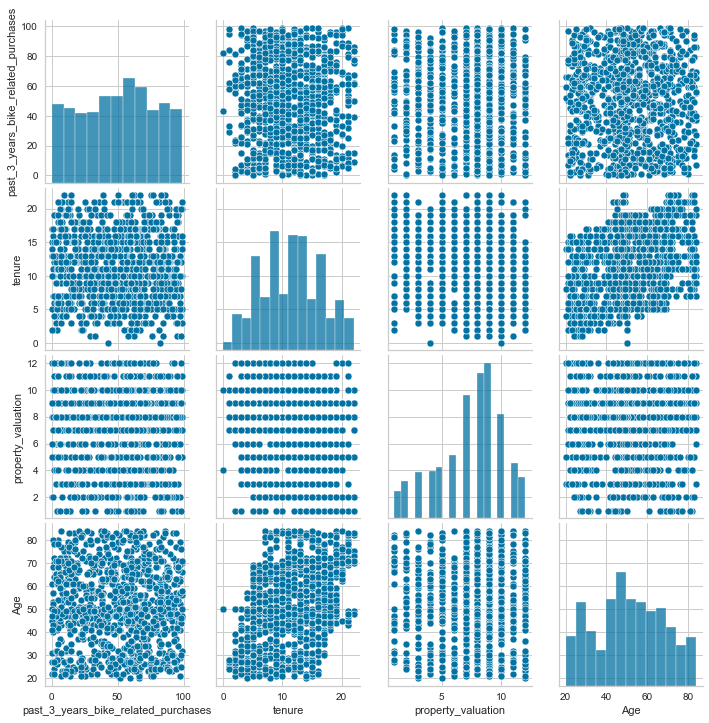

In [94]:
sns.pairplot(Newlist)

There is no visible correlation between the continuous variables.

**Dropping the job_title, since it has 184 levels and deceased_indicator as it has only one category**

In [95]:
Newlist=Newlist.drop(['job_title','deceased_indicator'],axis=1)
Newlist.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,Age
0,Male,86,Manufacturing,Mass Customer,Yes,14,QLD,6,65.0
1,Male,69,Property,Mass Customer,No,16,NSW,11,52.0
2,Female,10,Financial Services,Affluent Customer,No,10,VIC,5,48.0
3,Female,64,Manufacturing,Affluent Customer,Yes,5,QLD,1,43.0
4,Female,34,Financial Services,Affluent Customer,No,19,NSW,9,57.0


### Creating a new Dataframe to include only those columns from Final dataframe which are similar to Newlist of customers

In [133]:
df=pd.DataFrame()
df=Final[['customer_id','gender',
       'past_3_years_bike_related_purchases', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'state', 'property_valuation',
       'Age']]
df.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,Age
0,2950,Male,19,Financial Services,Mass Customer,Yes,10.0,VIC,6,67.0
1,2950,Male,19,Financial Services,Mass Customer,Yes,10.0,VIC,6,67.0
2,2950,Male,19,Financial Services,Mass Customer,Yes,10.0,VIC,6,67.0
3,3120,Female,89,Health,Mass Customer,Yes,10.0,NSW,5,43.0
4,3120,Female,89,Health,Mass Customer,Yes,10.0,NSW,5,43.0


In [134]:
# Merging the target variable (cluster name) to the new dataframe df
df=df.merge(rfm['Segment'],how='inner',on='customer_id')
df.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,Age,Segment
0,2950,Male,19,Financial Services,Mass Customer,Yes,10.0,VIC,6,67.0,Bronze
1,2950,Male,19,Financial Services,Mass Customer,Yes,10.0,VIC,6,67.0,Bronze
2,2950,Male,19,Financial Services,Mass Customer,Yes,10.0,VIC,6,67.0,Bronze
3,3120,Female,89,Health,Mass Customer,Yes,10.0,NSW,5,43.0,Diamond
4,3120,Female,89,Health,Mass Customer,Yes,10.0,NSW,5,43.0,Diamond


In [98]:
df.columns

Index(['customer_id', 'gender', 'past_3_years_bike_related_purchases',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'state', 'property_valuation', 'Age', 'Segment'],
      dtype='object')

In [99]:
#dropping customer_id column
df=df.drop(['customer_id'],axis=1)
df.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,Age,Segment
0,Male,19,Financial Services,Mass Customer,Yes,10.0,VIC,6,67.0,Bronze
1,Male,19,Financial Services,Mass Customer,Yes,10.0,VIC,6,67.0,Bronze
2,Male,19,Financial Services,Mass Customer,Yes,10.0,VIC,6,67.0,Bronze
3,Female,89,Health,Mass Customer,Yes,10.0,NSW,5,43.0,Diamond
4,Female,89,Health,Mass Customer,Yes,10.0,NSW,5,43.0,Diamond


In [100]:
df.nunique()

gender                                   3
past_3_years_bike_related_purchases    100
job_industry_category                    9
wealth_segment                           3
owns_car                                 2
tenure                                  22
state                                    5
property_valuation                      12
Age                                     55
Segment                                  5
dtype: int64

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19959 entries, 0 to 19958
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               19959 non-null  object 
 1   past_3_years_bike_related_purchases  19959 non-null  int64  
 2   job_industry_category                19959 non-null  object 
 3   wealth_segment                       19959 non-null  object 
 4   owns_car                             19959 non-null  object 
 5   tenure                               19959 non-null  float64
 6   state                                19959 non-null  object 
 7   property_valuation                   19959 non-null  int64  
 8   Age                                  19959 non-null  float64
 9   Segment                              19959 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.7+ MB


## Converting the Ordinal Categorical columns to numeric

In [102]:
# Treating the binary nominal variables first
df['Segment'].replace({"Diamond":3, "Platinum":4, "Gold":2 , "Silver":0, "Bronze":1}, inplace=True)

# Looking at data after nominal treatment
df.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,Age,Segment
0,Male,19,Financial Services,Mass Customer,Yes,10.0,VIC,6,67.0,1
1,Male,19,Financial Services,Mass Customer,Yes,10.0,VIC,6,67.0,1
2,Male,19,Financial Services,Mass Customer,Yes,10.0,VIC,6,67.0,1
3,Female,89,Health,Mass Customer,Yes,10.0,NSW,5,43.0,3
4,Female,89,Health,Mass Customer,Yes,10.0,NSW,5,43.0,3


### Including only the finally selected columns in DataforML

In [103]:
DataforML=df[['gender', 'past_3_years_bike_related_purchases',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'state', 'property_valuation', 'Age']]

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19959 entries, 0 to 19958
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               19959 non-null  object 
 1   past_3_years_bike_related_purchases  19959 non-null  int64  
 2   job_industry_category                19959 non-null  object 
 3   wealth_segment                       19959 non-null  object 
 4   owns_car                             19959 non-null  object 
 5   tenure                               19959 non-null  float64
 6   state                                19959 non-null  object 
 7   property_valuation                   19959 non-null  int64  
 8   Age                                  19959 non-null  float64
 9   Segment                              19959 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 1.7+ MB


# Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning

* Converting each Ordinal Categorical columns to numeric
* Converting Binary nominal Categorical columns to numeric using 1/0 mapping
* Converting all other nominal categorical columns to numeric using pd.get_dummies()
* Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

## Converting the binary nominal variable to numeric using 1/0 mapping

In [105]:
# Treating the binary nominal variables first
DataforML['owns_car'].replace({'Yes':1, 'No':0}, inplace=True)

# Looking at data after nominal treatment
DataforML.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,Age
0,Male,19,Financial Services,Mass Customer,1,10.0,VIC,6,67.0
1,Male,19,Financial Services,Mass Customer,1,10.0,VIC,6,67.0
2,Male,19,Financial Services,Mass Customer,1,10.0,VIC,6,67.0
3,Female,89,Health,Mass Customer,1,10.0,NSW,5,43.0
4,Female,89,Health,Mass Customer,1,10.0,NSW,5,43.0


In [106]:
# Saving this final data for reference during deployment
DataforML.to_pickle('DataForML.pkl')

## Converting the nominal variable to numeric using get_dummies()

In [107]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataforML)

# Adding Target Variable to the data
DataForML_Numeric['Segment']=df['Segment']

# Printing sample rows
DataForML_Numeric.head()

,past_3_years_bike_related_purchases,owns_car,tenure,property_valuation,Age,gender_Female,gender_Male,gender_Universal,job_industry_category_Argiculture,job_industry_category_Entertainment,...,job_industry_category_Telecommunications,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,state_NSW,state_New South Wales,state_QLD,state_VIC,state_Victoria,Segment
0,19,1,10.0,6,67.0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,19,1,10.0,6,67.0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2,19,1,10.0,6,67.0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,89,1,10.0,5,43.0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,3
4,89,1,10.0,5,43.0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,3


In [108]:
DataforTest=pd.get_dummies(Newlist)
DataforTest.head()

,past_3_years_bike_related_purchases,tenure,property_valuation,Age,gender_Female,gender_Male,gender_Universal,job_industry_category_Argiculture,job_industry_category_Entertainment,job_industry_category_Financial Services,...,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_No,owns_car_Yes,state_NSW,state_QLD,state_VIC
0,86,14,6,65.0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,69,16,11,52.0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
2,10,10,5,48.0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
3,64,5,1,43.0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,34,19,9,57.0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0


# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [109]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['past_3_years_bike_related_purchases', 'owns_car', 'tenure',
       'property_valuation', 'Age', 'gender_Female', 'gender_Male',
       'gender_Universal', 'job_industry_category_Argiculture',
       'job_industry_category_Entertainment',
       'job_industry_category_Financial Services',
       'job_industry_category_Health', 'job_industry_category_IT',
       'job_industry_category_Manufacturing', 'job_industry_category_Property',
       'job_industry_category_Retail',
       'job_industry_category_Telecommunications',
       'wealth_segment_Affluent Customer', 'wealth_segment_High Net Worth',
       'wealth_segment_Mass Customer', 'state_NSW', 'state_New South Wales',
       'state_QLD', 'state_VIC', 'state_Victoria', 'Segment'],
      dtype='object')

In [110]:
TargetVariable='Segment'
Predictors=['past_3_years_bike_related_purchases', 'owns_car', 'tenure',
       'property_valuation', 'Age', 'gender_Female', 'gender_Male',
       'gender_Universal', 'job_industry_category_Argiculture',
       'job_industry_category_Entertainment',
       'job_industry_category_Financial Services',
       'job_industry_category_Health', 'job_industry_category_IT',
       'job_industry_category_Manufacturing', 'job_industry_category_Property',
       'job_industry_category_Retail',
       'job_industry_category_Telecommunications',
       'wealth_segment_Affluent Customer', 'wealth_segment_High Net Worth',
       'wealth_segment_Mass Customer', 'state_NSW', 'state_New South Wales',
       'state_QLD', 'state_VIC', 'state_Victoria']
X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Standardization/Normalization of data
You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data. 

However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [111]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [177]:
X.shape

(19959, 25)

In [178]:
y.shape

(19959,)

### Applying KNN

In [134]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=11)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

KNeighborsClassifier(n_neighbors=11)
              precision    recall  f1-score   support

           0       0.40      0.20      0.27       635
           1       0.55      0.73      0.63      1489
           2       0.45      0.28      0.34       813
           3       0.47      0.35      0.40      1101
           4       0.59      0.73      0.65      1950

    accuracy                           0.54      5988
   macro avg       0.49      0.46      0.46      5988
weighted avg       0.52      0.54      0.52      5988

[[ 128  190   54   85  178]
 [  19 1088   65   86  231]
 [  43  211  224   94  241]
 [  83  245   78  380  315]
 [  46  237   81  169 1417]]
Accuracy of the model on Testing Sample Data: 0.52

Accuracy values for 10-fold Cross Validation:
 [0.24689719 0.21821423 0.27445296 0.28233662 0.23245045 0.23104589
 0.23800525 0.25195444 0.26081201 0.22475662]

Final Average Accuracy of the model: 0.25


In [135]:
from sklearn.model_selection import cross_val_score
error_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10)
    error_rate.append(1-score.mean())

## Now create the following plot using the information from your for loop.

Text(0, 0.5, 'Error Rate')

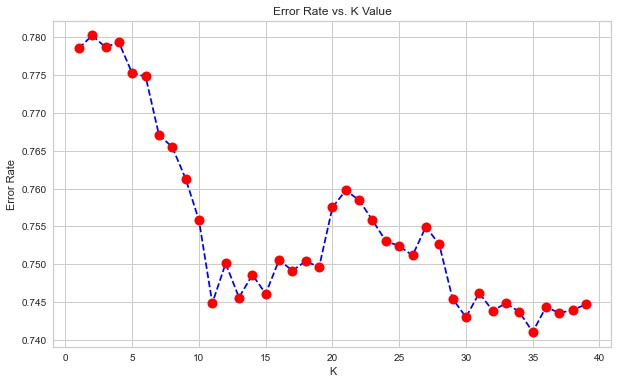

In [136]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')

plt.xlabel('K')
plt.ylabel('Error Rate')

# Random Forest

RandomForestClassifier(max_depth=10, n_estimators=600)
              precision    recall  f1-score   support

           0       1.00      0.23      0.37       800
           1       1.00      0.15      0.26       634
           2       0.96      0.47      0.63      1115
           3       0.50      1.00      0.66      2008
           4       0.90      0.71      0.80      1431

    accuracy                           0.64      5988
   macro avg       0.87      0.51      0.54      5988
weighted avg       0.80      0.64      0.61      5988

[[ 181    0    5  569   45]
 [   0   93   17  484   40]
 [   0    0  522  570   23]
 [   0    0    0 2008    0]
 [   0    0    0  414 1017]]
Accuracy of the model on Testing Sample Data: 0.61

Accuracy values for 10-fold Cross Validation:
 [0.20207381 0.18497674 0.2330443  0.22551678 0.17248645 0.18138705
 0.18929802 0.20812407 0.21969173 0.21095831]

Final Average Accuracy of the model: 0.2


<AxesSubplot:>

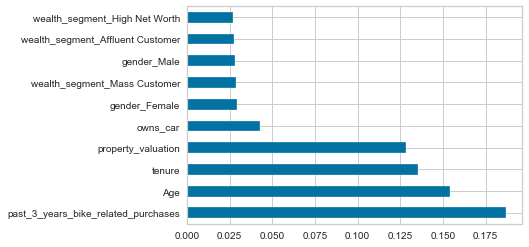

In [113]:
## Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose different hyperparameter values of max_depth, n_estimators and criterion to tune the model
clf = RandomForestClassifier(max_depth=10, n_estimators=600,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Support Vector Machines

In [179]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=3, kernel='rbf', gamma=0.1)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel

%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

SVC(C=3, gamma=0.1)
              precision    recall  f1-score   support

           0       0.53      0.01      0.02       800
           1       0.61      0.03      0.06       634
           2       0.43      0.15      0.23      1115
           3       0.40      0.82      0.54      2008
           4       0.40      0.41      0.40      1431

    accuracy                           0.41      5988
   macro avg       0.47      0.28      0.25      5988
weighted avg       0.44      0.41      0.33      5988

[[   9    7   45  547  192]
 [   2   20   44  406  162]
 [   3    6  172  680  254]
 [   0    0   80 1638  290]
 [   3    0   61  778  589]]
Accuracy of the model on Testing Sample Data: 0.33

Accuracy values for 10-fold Cross Validation:
 [0.23846535 0.23749064 0.29093666 0.24468545 0.23456    0.25248434
 0.23284834 0.24558496 0.23078957 0.22386153]

Final Average Accuracy of the model: 0.24


## Deployment of the Model
Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

I am choosing **Random Forest** as the final model since it is very fast and I observe that it is using the predictors better by looking at its variable importance chart. It is not letting a single predictor dominate the decision, which is good.

In order to deploy the model we follow below steps

* Train the model using 100% data available
* Save the model as a serialized file which can be stored anywhere
* Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction

### Step 1. Retraining the model using 100% data

In [115]:
# Separate Target Variable and Predictor Variables
TargetVariable='Segment'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['past_3_years_bike_related_purchases', 'owns_car', 'tenure',
       'property_valuation', 'Age', 'gender_Female', 'gender_Male',
       'gender_Universal', 'job_industry_category_Argiculture',
       'job_industry_category_Entertainment',
       'job_industry_category_Financial Services',
       'job_industry_category_Health', 'job_industry_category_IT',
       'job_industry_category_Manufacturing', 'job_industry_category_Property',
       'job_industry_category_Retail',
       'job_industry_category_Telecommunications',
       'wealth_segment_Affluent Customer', 'wealth_segment_High Net Worth',
       'wealth_segment_Mass Customer', 'state_NSW', 'state_New South Wales',
       'state_QLD', 'state_VIC', 'state_Victoria']
X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(19959, 25)
(19959,)


In [117]:
## Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose different hyperparameter values of max_depth, n_estimators and criterion to tune the model
clf = RandomForestClassifier(max_depth=10, n_estimators=600,criterion='gini')
# Training the model on 100% Data available
FinalModel=clf.fit(X,y)

In [118]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(FinalModel, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.19016189 0.19187037 0.22704788 0.22507459 0.18251692 0.19301556
 0.18913844 0.20517101 0.20253944 0.20404045]

Final Average Accuracy of the model: 0.2


### Step 2. Save the model as a serialized file which can be stored anywhere

In [119]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('FinalModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\Sreya Basak\python ML


### Step 3. Create a python function

In [125]:
# This Function can be called from any from any front end tool/website
def PredictCluster(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
    # Treating the binary nominal variables first
    InputData['owns_car'].replace({'Yes':1, 'No':0}, inplace=True)
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['past_3_years_bike_related_purchases', 'owns_car', 'tenure',
       'property_valuation', 'Age', 'gender_Female', 'gender_Male',
       'gender_Universal', 'job_industry_category_Argiculture',
       'job_industry_category_Entertainment',
       'job_industry_category_Financial Services',
       'job_industry_category_Health', 'job_industry_category_IT',
       'job_industry_category_Manufacturing', 'job_industry_category_Property',
       'job_industry_category_Retail',
       'job_industry_category_Telecommunications',
       'wealth_segment_Affluent Customer', 'wealth_segment_High Net Worth',
       'wealth_segment_Mass Customer', 'state_NSW', 'state_New South Wales',
       'state_QLD', 'state_VIC', 'state_Victoria']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('FinalModel.pkl', 'rb') as fileReadStream:
        Model=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=Model.predict(X)
    PredictedStatus=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictedStatus)
# Calling the function for some loan applications
#NewCustDetails=pd.DataFrame(
#data=[['Male',69,'Property','Mass Customer',16,'NSW',11,52.0],
 #    ['Female',10,'Financial Services','Affluent Customer',10,'VIC',5,48.0]],
#columns=['gender', 'past_3_years_bike_related_purchases',
#       'job_industry_category', 'wealth_segment',  'tenure',
#       'state', 'property_valuation', 'Age'])


#print(NewCustDetails)

# Calling the Function for prediction
pred_df=PredictCluster(InputData= Newlist)

#### The Function PredictCluster can be used to produce the predictions for one or more customer at a time. Hence, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the high valued customer available in the system.

### Taking the output in a dataframe 

In [126]:
pred_df

,Predicted Status
0,3
1,3
2,1
3,4
4,3
...,...
995,3
996,3
997,3
998,3


### Adding the Predicted Status to the New customer List since we wanted high valued customer from that list

In [128]:
Newlist['Segment']=pred_df['Predicted Status']
Newlist.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,Age,Segment
0,Male,86,Manufacturing,Mass Customer,Yes,14,QLD,6,65.0,3
1,Male,69,Property,Mass Customer,No,16,NSW,11,52.0,3
2,Female,10,Financial Services,Affluent Customer,No,10,VIC,5,48.0,1
3,Female,64,Manufacturing,Affluent Customer,Yes,5,QLD,1,43.0,4
4,Female,34,Financial Services,Affluent Customer,No,19,NSW,9,57.0,3


### Humanization of the clusters

In [131]:
humanization = {3:"Diamond", 4:"Platinum", 2:"Gold" , 0:"Silver", 1:"Bronze"}
Newlist["Segment"].replace(humanization,inplace=True)
Newlist.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,Age,Segment
0,Male,86,Manufacturing,Mass Customer,Yes,14,QLD,6,65.0,Diamond
1,Male,69,Property,Mass Customer,No,16,NSW,11,52.0,Diamond
2,Female,10,Financial Services,Affluent Customer,No,10,VIC,5,48.0,Bronze
3,Female,64,Manufacturing,Affluent Customer,Yes,5,QLD,1,43.0,Platinum
4,Female,34,Financial Services,Affluent Customer,No,19,NSW,9,57.0,Diamond


**Customers belonging to segment Diamond (3) and Platinum (4) since they can drive most value to the organization.**